In [117]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, transform
from skimage.transform import radon, iradon

In [46]:
# Specify path to imgs
path_mandarine = "C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Mandarine-100kV-1200muA/000.TIFF"
path_empty = "C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Empty/01_100KV_1200MUA.TIFF"

In [49]:
_img_mandarine = cv2.imread(path_mandarine,cv2.IMREAD_UNCHANGED)
img_empty = cv2.imread(path_empty,cv2.IMREAD_UNCHANGED)

In [50]:
minmand = np.min(_img_mandarine)
maxmand = np.max(_img_mandarine)

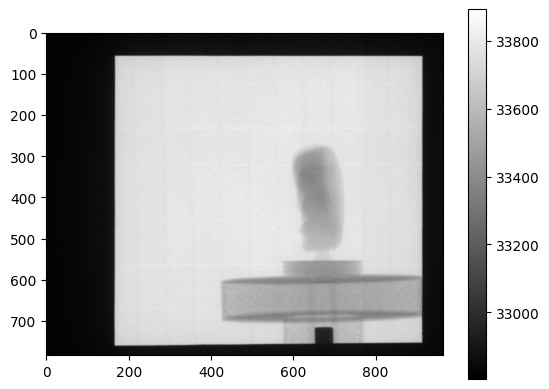

In [51]:
plt.imshow(_img_mandarine, cmap="grey", vmin=minmand, vmax=maxmand)
plt.colorbar()

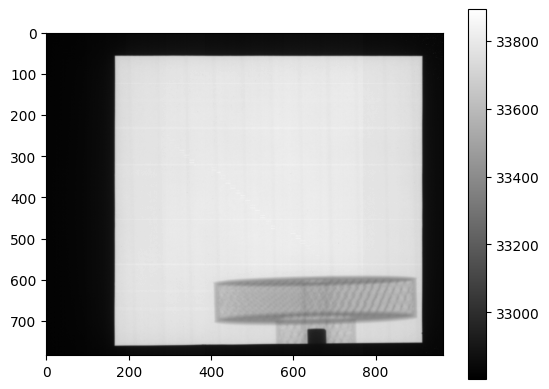

In [52]:
plt.imshow(img_empty, cmap="grey", vmin=minmand, vmax=maxmand)
plt.colorbar()

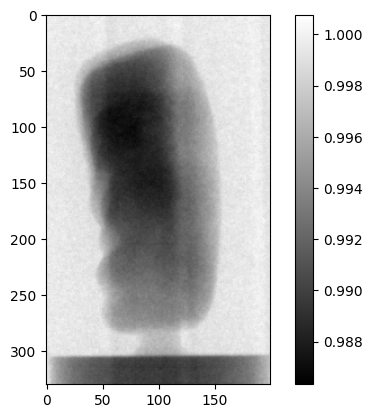

In [53]:
plt.imshow((_img_mandarine/img_empty)[250:580,570:770], cmap="grey")
plt.colorbar()

In [63]:
# Apply flatfield to all imgs & Save into an array
img_empty = img_empty = cv2.imread(path_empty,cv2.IMREAD_UNCHANGED)
folder_path = "C:/Users/caram/Documents/2024-08-21-Messungen/2024-08-21-Mandarine-100kV-1200muA/"

tiff_files = sorted(glob.glob(os.path.join(folder_path, '*.TIFF')))
if not tiff_files:
    print("Empty or no TIFF")
else:
    first_image = cv2.imread(tiff_files[0],cv2.IMREAD_UNCHANGED)
    
    if first_image is None:
        print(f"Failed to read first file: {tiff_files[0]}")
    else:
        height,width = first_image.shape[:2]
        num_images = len(tiff_files)
        
        Z = np.zeros((height,width,num_images))         # For uncorrected imgs
        Z_corr = np.zeros((height,width,num_images))    # For flatfield corrected imgs
    
        for i, file_path in enumerate(tiff_files):
            image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
            
            if image is None:
                print(f"Failed to read {file_path}")
            else:
                Z[:, :, i] = image
                Z_corr[:, :, i] = image/img_empty  # Store flatfield corrected image in the 3D array at index i
        
        # Display final information
        print(f"Stored {num_images} images in the 3D array Z & Z_corr with shape: {Z.shape}")

Stored 100 images in the 3D array Z & Z_corr with shape: (784, 964, 100)


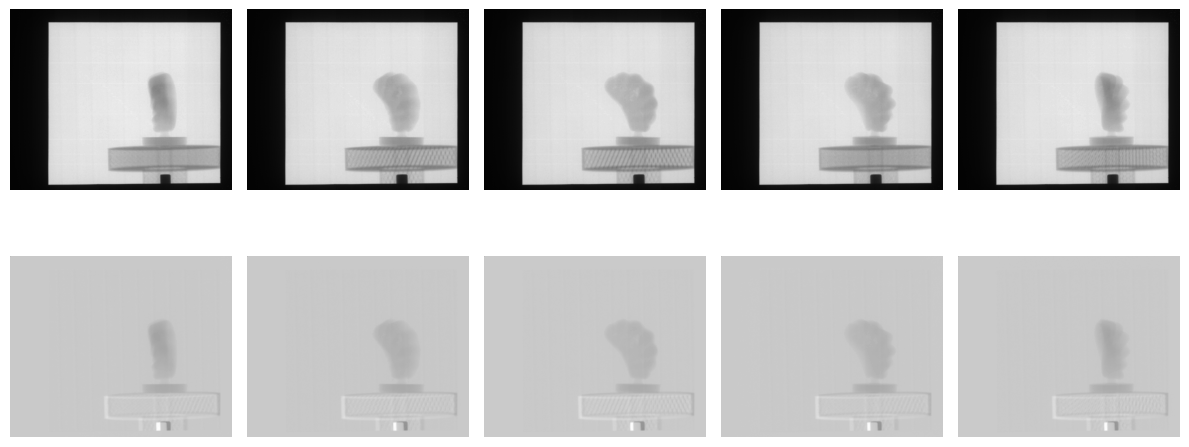

In [93]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
axs[0,0].imshow(Z[:,:,0], cmap="grey")
axs[0,1].imshow(Z[:,:,20], cmap="grey")
axs[0,2].imshow(Z[:,:,40], cmap="grey")
axs[0,3].imshow(Z[:,:,60], cmap="grey")
axs[0,4].imshow(Z[:,:,80], cmap="grey")

axs[1,0].imshow(Z_corr[:,:,0], cmap="grey")
axs[1,1].imshow(Z_corr[:,:,20], cmap="grey")
axs[1,2].imshow(Z_corr[:,:,40], cmap="grey")
axs[1,3].imshow(Z_corr[:,:,60], cmap="grey")
axs[1,4].imshow(Z_corr[:,:,80], cmap="grey")

for ax in axs.flat:
    ax.axis("off")

plt.subplots_adjust(hspace=0.000001, wspace=0.1)

plt.tight_layout()
plt.show()

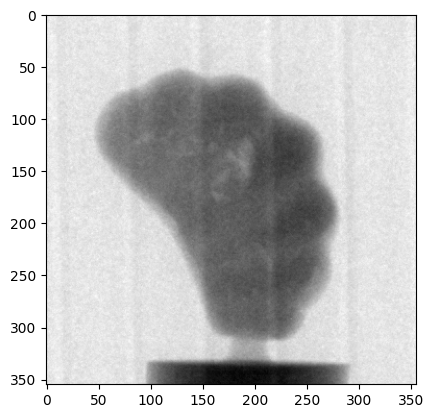

In [107]:
# Set boundaries for object, (atm>empiric)
plt.imshow(Z_corr[220:575,475:830,40], cmap="grey")

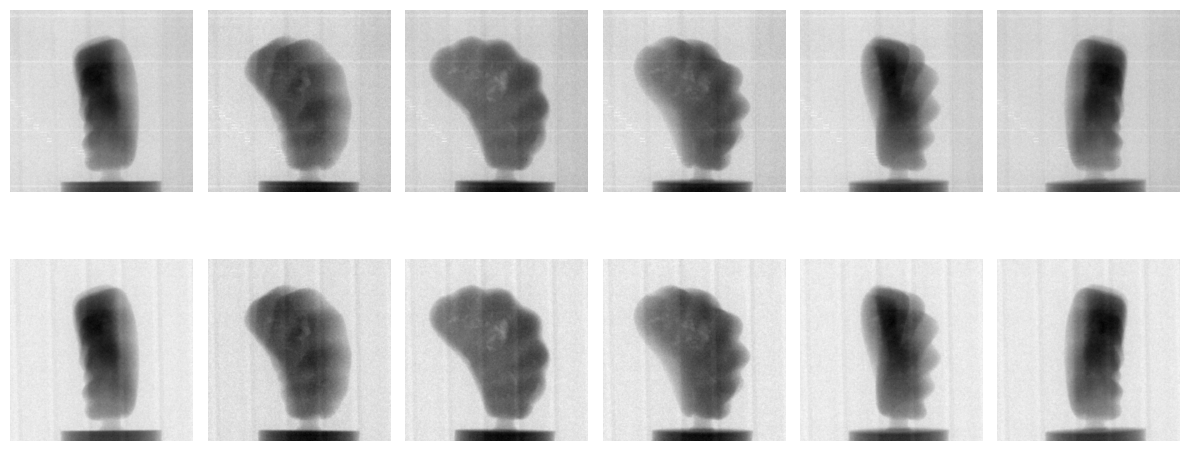

In [110]:
fig, axs = plt.subplots(2, 6, figsize=(12, 6))
axs[0,0].imshow(Z[220:575,475:830,0], cmap="grey")
axs[0,1].imshow(Z[220:575,475:830,20], cmap="grey")
axs[0,2].imshow(Z[220:575,475:830,40], cmap="grey")
axs[0,3].imshow(Z[220:575,475:830,60], cmap="grey")
axs[0,4].imshow(Z[220:575,475:830,80], cmap="grey")
axs[0,5].imshow(Z[220:575,475:830,99], cmap="grey")

axs[1,0].imshow(Z_corr[220:575,475:830,0], cmap="grey")
axs[1,1].imshow(Z_corr[220:575,475:830,20], cmap="grey")
axs[1,2].imshow(Z_corr[220:575,475:830,40], cmap="grey")
axs[1,3].imshow(Z_corr[220:575,475:830,60], cmap="grey")
axs[1,4].imshow(Z_corr[220:575,475:830,80], cmap="grey")
axs[1,5].imshow(Z_corr[220:575,475:830,99], cmap="grey")

for ax in axs.flat:
    ax.axis("off")

plt.subplots_adjust(hspace=0.000001, wspace=0.1)

plt.tight_layout()
plt.show()

In [114]:
# Create new arrays with cutout imgs
Z_prime = Z[220:575,475:830,:]
Z_corr_prime = Z_corr[220:575,475:830,:]

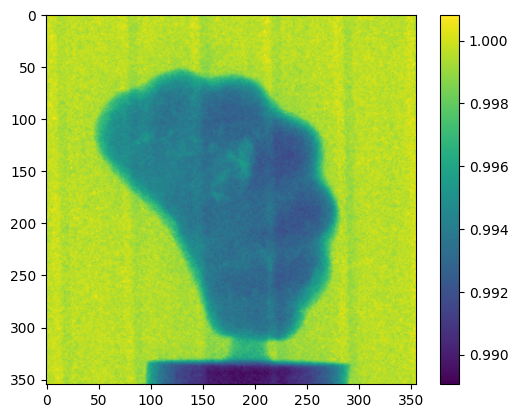

In [148]:
plt.imshow(Z_corr_prime[:,:,40])
plt.colorbar()

In [115]:
Z.shape[2]

100

In [116]:
theta = np.linspace(0.,180.,Z.shape[2], endpoint=False)

In [118]:
FB = np.zeros((Z_prime.shape[1],Z_prime.shape[1],Z_prime.shape[0]))
for i in range(Z_prime.shape[0]):
    S = np.squeeze(Z_prime[i,:,:])
    FB[:,:,i] = iradon(S, theta=theta)

In [131]:
FB_corr = np.zeros((Z_corr_prime.shape[1],Z_corr_prime.shape[1],Z_corr_prime.shape[0]))
for i in range(Z_corr_prime.shape[0]):
    S = np.squeeze(Z_corr_prime[i,:,:])
    FB_corr[:,:,i] = iradon(S, theta=theta)

In [132]:
FB_corr.shape

(355, 355, 355)

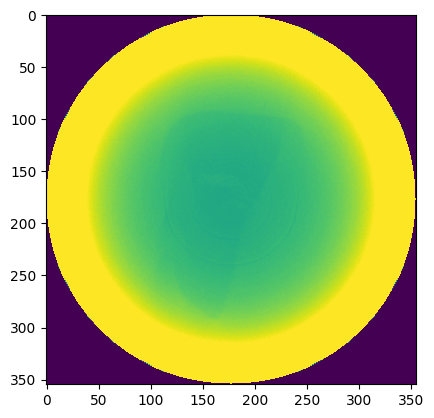

In [130]:
Ma = np.max(FB[:])
Mi = np.min(FB[:])

plt.imshow(FB[:,:,150], vmax=Ma*0.1, vmin=0)

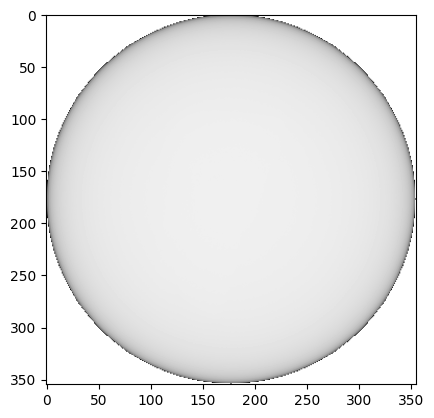

In [163]:
Ma = np.max(FB_corr[:])
Mi = np.min(FB_corr[:])

plt.imshow(1-FB_corr[:,:,150], cmap="grey")

In [158]:
Z2 = np.zeros_like(Z_prime)
for i in range(Z_prime.shape[2]):
    Z2[:,:,i] = Z_prime[:,:,i]/img_empty[220:575,475:830]

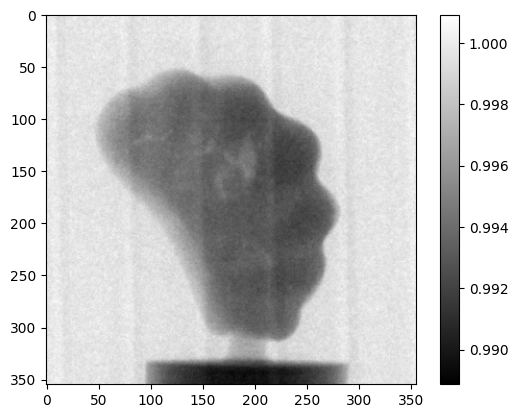

In [167]:
plt.imshow(Z2[:,:,50], cmap="grey")
plt.colorbar()

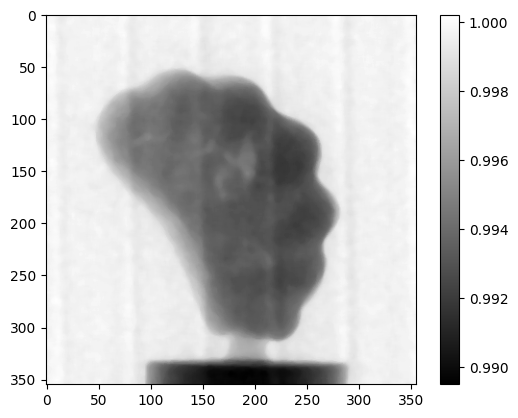

In [193]:
from scipy.ndimage import median_filter

# Apply median filter to the image
filtered_image = median_filter(Z2[:,:,50], size=(7, 7))  # Adjust size as needed
plt.imshow(filtered_image, cmap='gray')
plt.colorbar()
plt.show()

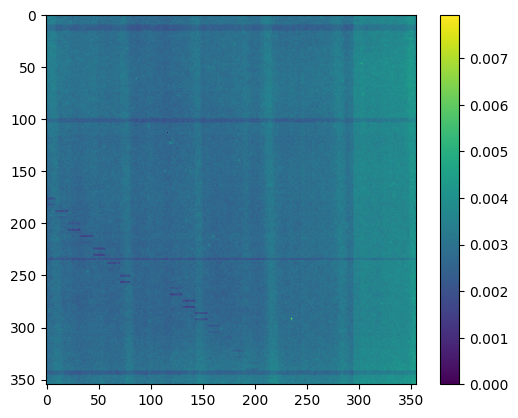

In [171]:
plt.imshow(1-(img_empty[220:575,475:830]/np.max(img_empty[220:575,475:830])))
plt.colorbar()